# Interpretability

- https://shap.readthedocs.io/en/latest/

In [1]:
#!pip install shap

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
import shap
import matplotlib as plt

shap.initjs()
pd.options.display.max_columns = None

In [3]:
X1 = pd.read_csv('X1.csv')
X2 = pd.read_csv('X2.csv')
target = pd.read_csv('target.csv')

df_legend = pd.read_excel('df_project2.xlsx', sheet_name = 'data_dictionary') # read the data dictionary

## Model X1

In [4]:
existing_columns_x1 = X1.columns

numeric_cols_x1 = list(set(df_legend[df_legend['isnumeric']==1]['name_col']).intersection(existing_columns_x1))
yes_no_cols_x1 = list(set(df_legend[df_legend['no_yes_vars']==1]['name_col']).intersection(existing_columns_x1))
other_cols_x1 = list(set(df_legend[(df_legend['no_yes_vars']==0) & (df_legend['isnumeric']==0)]['name_col']).intersection(existing_columns_x1))

# add dummy columns that are missin from previous lists
#missing_cols_x1 = set(existing_columns_x1).difference(numeric_cols).difference(yes_no_cols).difference(other_cols)

In [5]:
# model X1

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data_x1 = pd.read_csv('X1.csv', dtype=np.float64)
target = pd.read_csv('target.csv')

#features = tpot_data.drop('target', axis=1)
training_features_x1, testing_features_x1, training_target_x1, testing_target_x1 = \
            train_test_split(tpot_data_x1, target, random_state=25)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features_x1)
training_features_x1 = imputer.transform(training_features_x1)
testing_features_x1 = imputer.transform(testing_features_x1)

# Average CV score on the training set was: 0.9100745054544891
exported_pipeline_x1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, max_features=0.4, 
                                                  min_samples_leaf=4, min_samples_split=19, 
                                                  n_estimators=100, subsample=0.35000000000000003)

exported_pipeline_x1.fit(training_features_x1, training_target_x1)
results_x1 = exported_pipeline_x1.predict(testing_features_x1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [6]:
explainer_x1 = shap.TreeExplainer(exported_pipeline_x1)
shap_values_x1 = explainer_x1.shap_values(testing_features_x1)

pd.DataFrame(shap_values_x1).head()

0    1         2    3    4    5    6    7    8        9         10  \
0  0.0  0.0  0.063977  0.0  0.0  0.0  0.0  0.0  0.0 -0.03483 -0.003982   
1  0.0  0.0 -0.033442  0.0  0.0  0.0  0.0  0.0  0.0 -0.03483 -0.003982   
2  0.0  0.0 -0.033442  0.0  0.0  0.0  0.0  0.0  0.0 -0.03483 -0.003982   
3  0.0  0.0 -0.033442  0.0  0.0  0.0  0.0  0.0  0.0 -0.03483 -0.003982   
4  0.0  0.0 -0.033442  0.0  0.0  0.0  0.0  0.0  0.0 -0.03483 -0.003982   

         11        12        13        14        15        16   17   18   19  \
0 -0.033388 -0.038742 -0.048259 -0.025164 -0.018381 -0.094956  0.0  0.0  0.0   
1 -0.033388 -0.038742 -0.048259 -0.025164 -0.018381  0.219609  0.0  0.0  0.0   
2 -0.033388 -0.038742 -0.048259 -0.025164 -0.018381  0.337059  0.0  0.0  0.0   
3 -0.033388 -0.038742 -0.048259 -0.025164 -0.018381 -0.094956  0.0  0.0  0.0   
4 -0.033388 -0.038742 -0.048259 -0.025164 -0.018381 -0.094956  0.0  0.0  0.0   

    20   21   22        23   24   25        26        27        28   29  \
0  0.0  0.0  0.0 -0.012053  0.0  0.0 -0.004626 -0.014578 -0.005563  0.0   
1  0.0  0.0  0.0 -0.012053  0.0  0.0 -0.004626 -0.014578 -0.005563  0.0   
2  0.0  0.0  0.0 -0.012053  0.0  0.0 -0.004626 -0.014578 -0.005563  0.0   
3  0.0  0.0  0.0 -0.012053  0.0  0.0 -0.004626 -0.014578 -0.005563  0.0   
4  0.0  0.0  0.0 -0.012053  0.0  0.0 -0.004626 -0.014578 -0.005563  0.0   

         30        31        32        33        34        35        36  \
0 -0.027906 -0.015391 -0.001609 -0.023762 -0.002882 -0.044524 -0.104551   
1 -0.027906 -0.015391 -0.001609 -0.023762 -0.002882  0.091604  0.274501   
2 -0.027906 -0.015391 -0.001609 -0.023762 -0.002882  0.203832  0.274501   
3 -0.027906 -0.015391 -0.001609 -0.023762 -0.002882 -0.044524 -0.104551   
4 -0.027906 -0.015391 -0.001609 -0.023762 -0.002882 -0.044524 -0.104551   

         37        38        39        40        41        42        43   44  \
0 -0.018283  0.001877 -0.014539 -0.023408 -0.001192 -0.007328  0.003143  0.0   
1 -0.018283  0.001877 -0.014539 -0.023408 -0.001192 -0.007328  0.003143  0.0   
2  0.055497  0.001877  0.050733  0.174536 -0.001192 -0.007328  0.003143  0.0   
3 -0.018283  0.001877 -0.014539 -0.023408 -0.001192 -0.007328  0.003143  0.0   
4 -0.018283  0.001877 -0.014539 -0.023408 -0.001192 -0.007328  0.003143  0.0   

    45   46        47        48        49       50        51   52   53   54  \
0  0.0  0.0 -0.011039 -0.001502 -0.035960 -0.00533 -0.159721  0.0  0.0  0.0   
1  0.0  0.0 -0.011039 -0.001502 -0.035960 -0.00533 -0.085367  0.0  0.0  0.0   
2  0.0  0.0  0.089516 -0.001502  0.043223 -0.00533  0.511642  0.0  0.0  0.0   
3  0.0  0.0 -0.011039 -0.001502 -0.035960 -0.00533 -0.159721  0.0  0.0  0.0   
4  0.0  0.0 -0.011039 -0.001502 -0.035960 -0.00533 -0.159721  0.0  0.0  0.0   

    55   56   57   58   59  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0

In [7]:
# add labels
df_testing_x1 = pd.DataFrame(testing_features_x1, columns = X1.columns)

### Global

#### Feature Importances

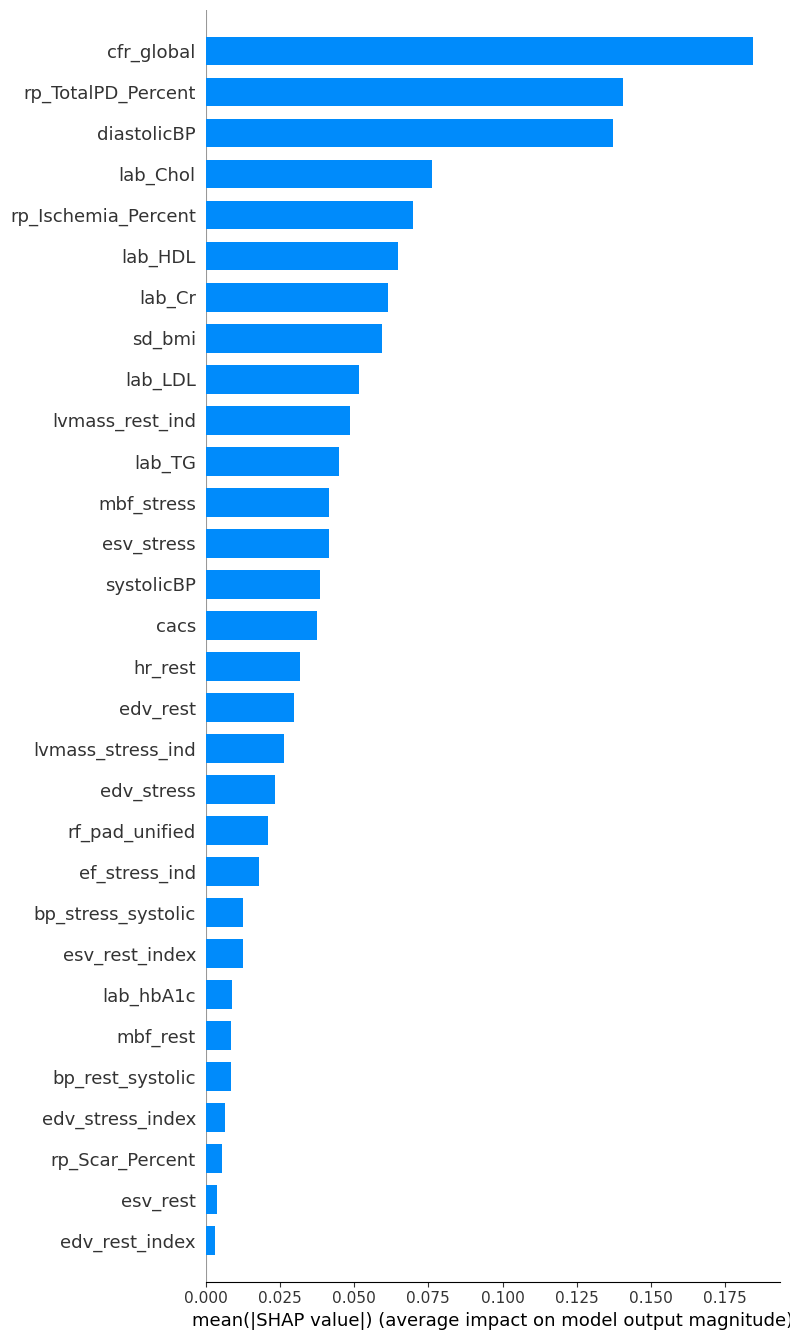

In [8]:
shap.summary_plot(shap_values_x1, df_testing_x1, plot_type="bar", max_display = 30)

#### SHAP Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


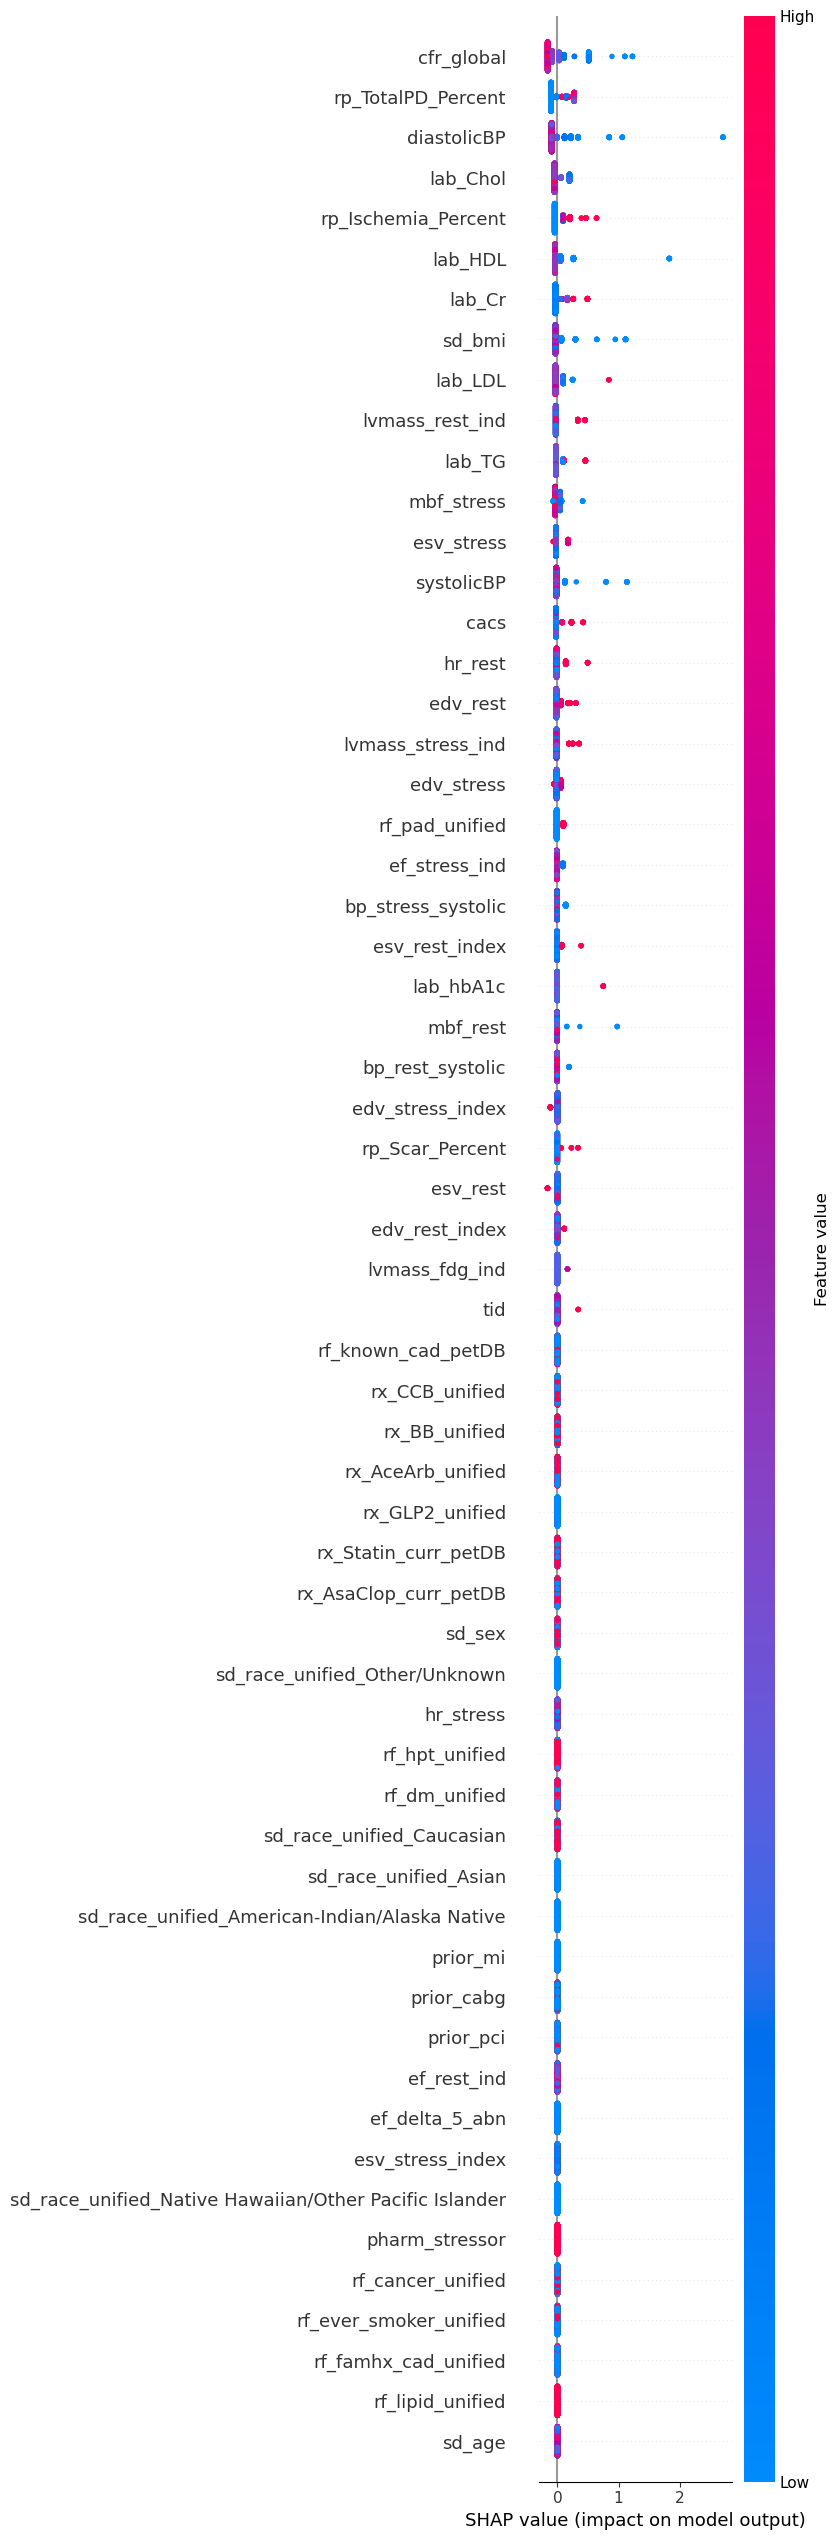

In [9]:
shap.summary_plot(shap_values_x1, df_testing_x1, max_display = 100)

#### PDP

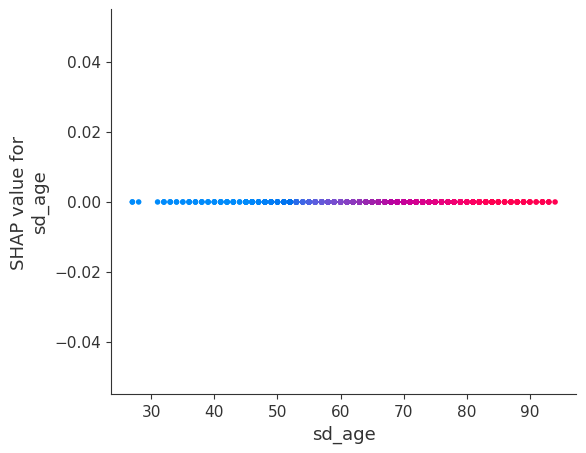

In [10]:
shap.dependence_plot(ind = 'sd_age', interaction_index = 'sd_age',
                     shap_values = shap_values_x1, 
                     features = df_testing_x1,
                    feature_names = df_testing_x1.columns)

### Local

In [11]:
# mace predicted as 1
np.where(results_x1 == 1)

(array([  23,   99,  242,  304,  371,  568,  572,  661,  819,  828,  843,
         906,  910,  918, 1068], dtype=int64),)

In [12]:
# actual values as 1
np.where(testing_target_x1 == 1)

(array([   1,   12,   23,   43,   61,   99,  109,  121,  125,  137,  145,
         155,  175,  190,  221,  223,  244,  289,  295,  303,  304,  323,
         364,  366,  454,  508,  534,  551,  568,  571,  572,  583,  588,
         596,  609,  610,  616,  624,  661,  670,  678,  684,  693,  744,
         748,  779,  792,  810,  819,  838,  866,  867,  889,  905,  974,
         978,  980,  996, 1015, 1025, 1036, 1052, 1068, 1075], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [13]:
# predicting when mace = 1
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[17,:], df_testing_x1.iloc[17,:]) # using index x

In [14]:
# predicting when mace=0
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[390,:], df_testing_x1.iloc[390,:]) # using index x

In [15]:
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[:1000,:], df_testing_x1.iloc[:1000,:])

### Group

In [16]:
df_results_x1 = pd.DataFrame(results_x1, columns = target.columns)
df_testing_x1 = pd.DataFrame(testing_features_x1, columns = X1.columns)

In [17]:
# combine results with features
combined = pd.concat([df_testing_x1, df_results_x1], axis=1)

In [18]:
# filter data takes in user given filters
# The expected input is a matrix where each array is a key, value pair
# Example of expected input [['sd_sex', 0],['sd_race_unified_Caucasian',1]]

def filterData(data, filters):
    filtered_data = data.copy()
    for filter_pair in filters:
        key, value = filter_pair
        filtered_data = filtered_data.loc[filtered_data[key] == value]
    
    return filtered_data
    
def getMaceArrays(data, filters):
    filtered = filterData(combined, test_filters)

    mace0 = filtered[filtered['o_mace'] == 0]
    mace0 = mace0.drop('o_mace', axis = 1)
    mace1 = filtered[filtered['o_mace'] == 1]
    mace1 = mace1.drop('o_mace', axis = 1)
    return [mace0, mace1]

def getAggregatedData(data, numeric_cols, yes_no_cols, other_cols):
    mace_median = data[numeric_cols].median()
    mace_mode = data[yes_no_cols + other_cols].mode()
    merged = pd.DataFrame(mace_median).T.merge(mace_mode)
    
    return merged

def createForcePlot(pipeline, data, title):
    shap.initjs()
    explainer = shap.TreeExplainer(pipeline)
    shap_values = explainer.shap_values(data)
    print(title)
    return shap.force_plot(explainer.expected_value, shap_values, data)


In [19]:
# select filters
test_filters = [['sd_sex', 0], ['sd_race_unified_Caucasian',1]]

# 2 datasets: mace=0, mace=1
mace0, mace1 = getMaceArrays(combined, test_filters)

In [20]:
# aggregate values for group level
mace_0_aggregated_x1 = getAggregatedData(mace0, numeric_cols_x1, yes_no_cols_x1, other_cols_x1)
mace_1_aggregated_x1 = getAggregatedData(mace1, numeric_cols_x1, yes_no_cols_x1, other_cols_x1)

In [21]:
# mace=0
createForcePlot(exported_pipeline_x1, mace_0_aggregated_x1, 'Mace 0')

Mace 0


In [22]:
# mace=1
createForcePlot(exported_pipeline_x1, mace_1_aggregated_x1, 'Mace 1')

Mace 1


In [23]:
from tkinter import *

window=Tk()
window.title('Interpretability Group')
window.geometry("700x300+10+10")
        
# Dropdown menu options
OPTIONS1 = X1.columns
        
columns_copy = list(X1.columns.copy())
columns_copy.insert(0, "none")
        
OPTIONS2 = columns_copy
        
#function to aggregate over the data based on the selections
def oki():
    global test_filters
    global mace0
    global mace1
    global mace_0_aggregated_x1
    global mace_1_aggregated_x1
    if clicked2.get() == "none":
        test_filters = [[clicked1.get(), float(t1.get())]]
    elif clicked3.get() == "none":
        test_filters = [[clicked1.get(), float(t1.get())], [clicked2.get(), float(t2.get())]]
    else:
        test_filters = [[clicked1.get(), float(t1.get())], [clicked2.get(), float(t2.get())], 
                        [clicked3.get(), float(t3.get())]]
                
    mace0, mace1 = getMaceArrays(combined, test_filters)
    mace_0_aggregated_x1 = getAggregatedData(mace0, numeric_cols_x1, yes_no_cols_x1, other_cols_x1)
    mace_1_aggregated_x1 = getAggregatedData(mace1, numeric_cols_x1, yes_no_cols_x1, other_cols_x1)
    label.config( text = test_filters )

# datatype of menu text
clicked1 = StringVar(window)
clicked2 = StringVar(window)
clicked3 = StringVar(window)

# initial menu text
clicked1.set(OPTIONS1[0])
clicked2.set(OPTIONS2[0])
clicked3.set(OPTIONS2[0])

# Create Dropdown menues
drop1 = OptionMenu( window , clicked1 , *OPTIONS1 )
drop1.pack()
drop1.place(x=100, y=50)
drop2 = OptionMenu( window , clicked2 , *OPTIONS2 )
drop2.pack()
drop2.place(x=100, y=100)
drop3 = OptionMenu( window , clicked3 , *OPTIONS2 )
drop3.pack()
drop3.place(x=100, y=150)
        
#Create OK button
button = Button(window, text="OK", command=oki)
button.pack()
button.place(x=150, y=200)
        
#Create exit button
exit_button = Button(window, text="Exit", command=window.destroy)
exit_button.pack(pady=20)
exit_button.place(x=500, y=200)
        
#Create label info window
label = Label( window , text = " " )
label.pack()
        
#Create entry box windows for values
t1=Entry()
t2=Entry()
t3=Entry()
t1.place(x=500, y=50)
t2.place(x=500, y=100)
t3.place(x=500, y=150)

window.mainloop()

In [24]:
# mace=0
print(test_filters)
createForcePlot(exported_pipeline_x1, mace_0_aggregated_x1, 'Mace 0')

[['sd_sex', 0.0], ['sd_race_unified_Caucasian', 1.0], ['rx_AsaClop_curr_petDB', 1.0]]


Mace 0


In [25]:
# mace=1
print(test_filters)
createForcePlot(exported_pipeline_x1, mace_1_aggregated_x1, 'Mace 1')

[['sd_sex', 0.0], ['sd_race_unified_Caucasian', 1.0], ['rx_AsaClop_curr_petDB', 1.0]]


Mace 1


## Model X2

In [26]:
# model X2

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data_x2 = pd.read_csv('X2.csv', dtype=np.float64)
target = pd.read_csv('target.csv')

training_features_x2, testing_features_x2, training_target_x2, testing_target_x2 = \
            train_test_split(tpot_data_x2, target, random_state=25)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features_x2)
training_features_x2 = imputer.transform(training_features_x2)
testing_features_x2 = imputer.transform(testing_features_x2)

# Average CV score on the training set was: 0.90934345410496
exported_pipeline_x2 = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.15000000000000002, n_estimators=100), 
        step=0.9000000000000001),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.3, min_samples_leaf=12, 
                               min_samples_split=3, n_estimators=100, subsample=0.4))

exported_pipeline_x2.fit(training_features_x2, training_target_x2)
results_x2 = exported_pipeline_x2.predict(testing_features_x2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Global

#### Feature Importances

#### SHAP Summary Plot

### Local

### Group